In [3]:
import pandas as pd

df1 = pd.read_json("participants.json")
df1.head()

,id,created_at,gender,subscriber_count,subscriber_ids,subscription_count,subscription_ids,viewed_count,viewed_ids,views,roommate_ids
0,1,12,male,30,"[150, 122, 214, 198, 14, 19, 66, 175, 99, 160,...",5,"[150, 122, 14, 19, 124]",30,"[187, 46, 150, 122, 214, 198, 14, 19, 66, 175,...",175,"[83, 132, 14]"
1,2,12,male,20,"[150, 65, 99, 76, 194, 93, 153, 94, 145, 218, ...",5,"[104, 147, 189, 13]",46,"[203, 120, 204, 25, 207, 118, 1, 27, 43, 51, 1...",116,"[8, 173, 38]"
2,3,12,female,15,"[82, 62, 15, 11, 67, 115, 211, 142, 55, 85, 90...",3,"[62, 15, 115]",28,"[215, 35, 85, 67, 62, 82, 32, 155, 158, 102, 2...",54,"[62, 115, 15]"
3,4,11,female,7,"[22, 11, 29, 211, 181, 166, 98]",6,"[215, 85, 67, 62, 22, 130]",9,"[215, 35, 85, 67, 62, 22, 32, 155, 130]",36,"[208, 191]"
4,5,2,male,2,"[145, 169]",4,"[145, 152, 214, 53]",51,"[145, 169, 203, 120, 204, 25, 207, 118, 1, 27,...",9,"[53, 152, 214]"


In [4]:
df2 = pd.read_json("answers.json")
df2.head()

,field_id,respondent_id,option
0,1,1,0
1,1,2,2
2,1,3,0
3,1,4,0
4,1,5,1


In [5]:
df2 = pd.DataFrame(df2.groupby(['respondent_id'])['option'].apply(list))
df2.head()

,option
respondent_id,
1,"[0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1]"
2,"[2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1]"
3,"[0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0]"
4,"[0, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0]"
5,"[1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]"


In [6]:
df2['id'] = df2.index

df2.head()

,option,id
respondent_id,,
1,"[0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1]",1
2,"[2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1]",2
3,"[0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0]",3
4,"[0, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0]",4
5,"[1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]",5


In [7]:
df = pd.merge(df1, df2)

df.head()

,id,created_at,gender,subscriber_count,subscriber_ids,subscription_count,subscription_ids,viewed_count,viewed_ids,views,roommate_ids,option
0,1,12,male,30,"[150, 122, 214, 198, 14, 19, 66, 175, 99, 160,...",5,"[150, 122, 14, 19, 124]",30,"[187, 46, 150, 122, 214, 198, 14, 19, 66, 175,...",175,"[83, 132, 14]","[0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1]"
1,2,12,male,20,"[150, 65, 99, 76, 194, 93, 153, 94, 145, 218, ...",5,"[104, 147, 189, 13]",46,"[203, 120, 204, 25, 207, 118, 1, 27, 43, 51, 1...",116,"[8, 173, 38]","[2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1]"
2,3,12,female,15,"[82, 62, 15, 11, 67, 115, 211, 142, 55, 85, 90...",3,"[62, 15, 115]",28,"[215, 35, 85, 67, 62, 82, 32, 155, 158, 102, 2...",54,"[62, 115, 15]","[0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0]"
3,4,11,female,7,"[22, 11, 29, 211, 181, 166, 98]",6,"[215, 85, 67, 62, 22, 130]",9,"[215, 35, 85, 67, 62, 22, 32, 155, 130]",36,"[208, 191]","[0, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0]"
4,5,2,male,2,"[145, 169]",4,"[145, 152, 214, 53]",51,"[145, 169, 203, 120, 204, 25, 207, 118, 1, 27,...",9,"[53, 152, 214]","[1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]"


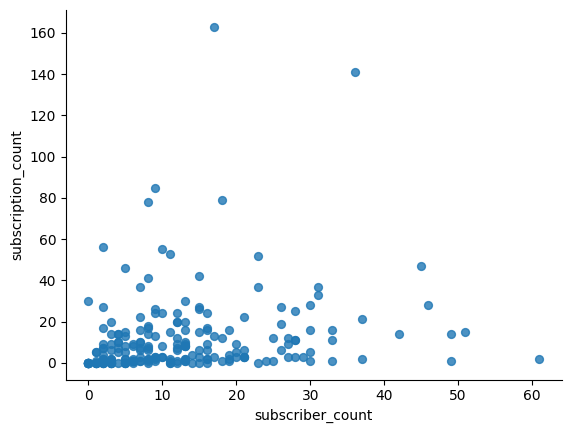

In [8]:
# @title subscriber_count vs subscription_count

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='subscriber_count', y='subscription_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

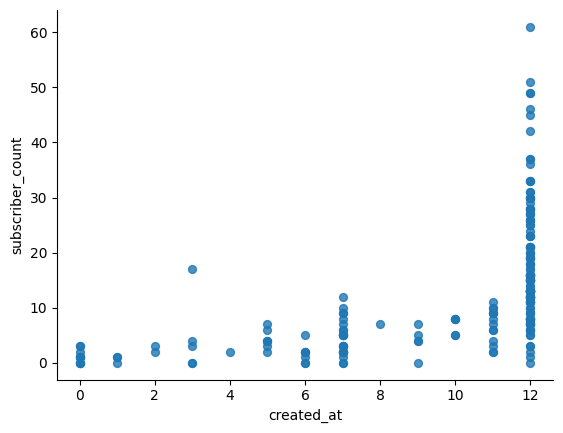

In [9]:
# @title created_at vs subscriber_count

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='created_at', y='subscriber_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [42]:
from scipy import spatial
import numpy as np

def get_content_similarity(df: pd.DataFrame, user_id1: int, user_id2: int):
    """Calculates the cosine similarity between two users' content."""
    vec1 = df[df['id'] == user_id1]['option'].iloc[0]
    vec2 = df[df['id'] == user_id2]['option'].iloc[0]

    # Pad the shorter vector with zeros
    max_len = max(len(vec1), len(vec2))
    vec1 = np.pad(vec1, (0, max_len - len(vec1)), 'constant')
    vec2 = np.pad(vec2, (0, max_len - len(vec2)), 'constant')

    result = 1 - spatial.distance.cosine(vec1, vec2)
    return result

get_content_similarity(df, 1, 2)

0.7610423906471906

In [47]:
# Calculate pairwise similarity scores
user_ids = df['id'].unique()
similarity_matrix = np.zeros((len(user_ids), len(user_ids)))

for i, user1 in enumerate(user_ids):
    for j, user2 in enumerate(user_ids):
        similarity_matrix[i, j] = get_content_similarity(df, user1, user2)

In [48]:
similarity_matrix[169, 173]

0.7647191129018727

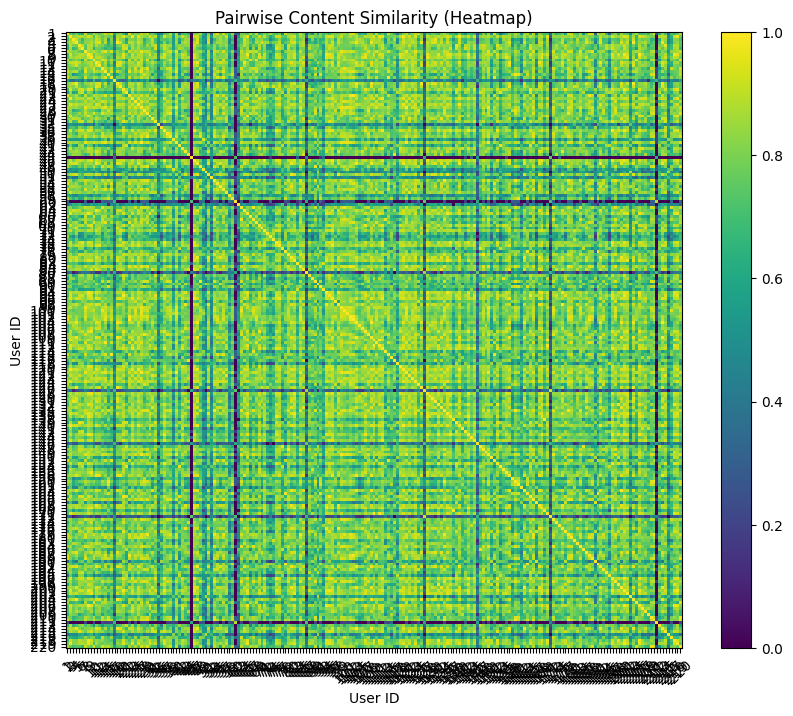

In [50]:
# 1D Visualization (Heatmap):
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(user_ids)), user_ids, rotation=45)
plt.yticks(range(len(user_ids)), user_ids)
plt.title('Pairwise Content Similarity (Heatmap)')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.show()

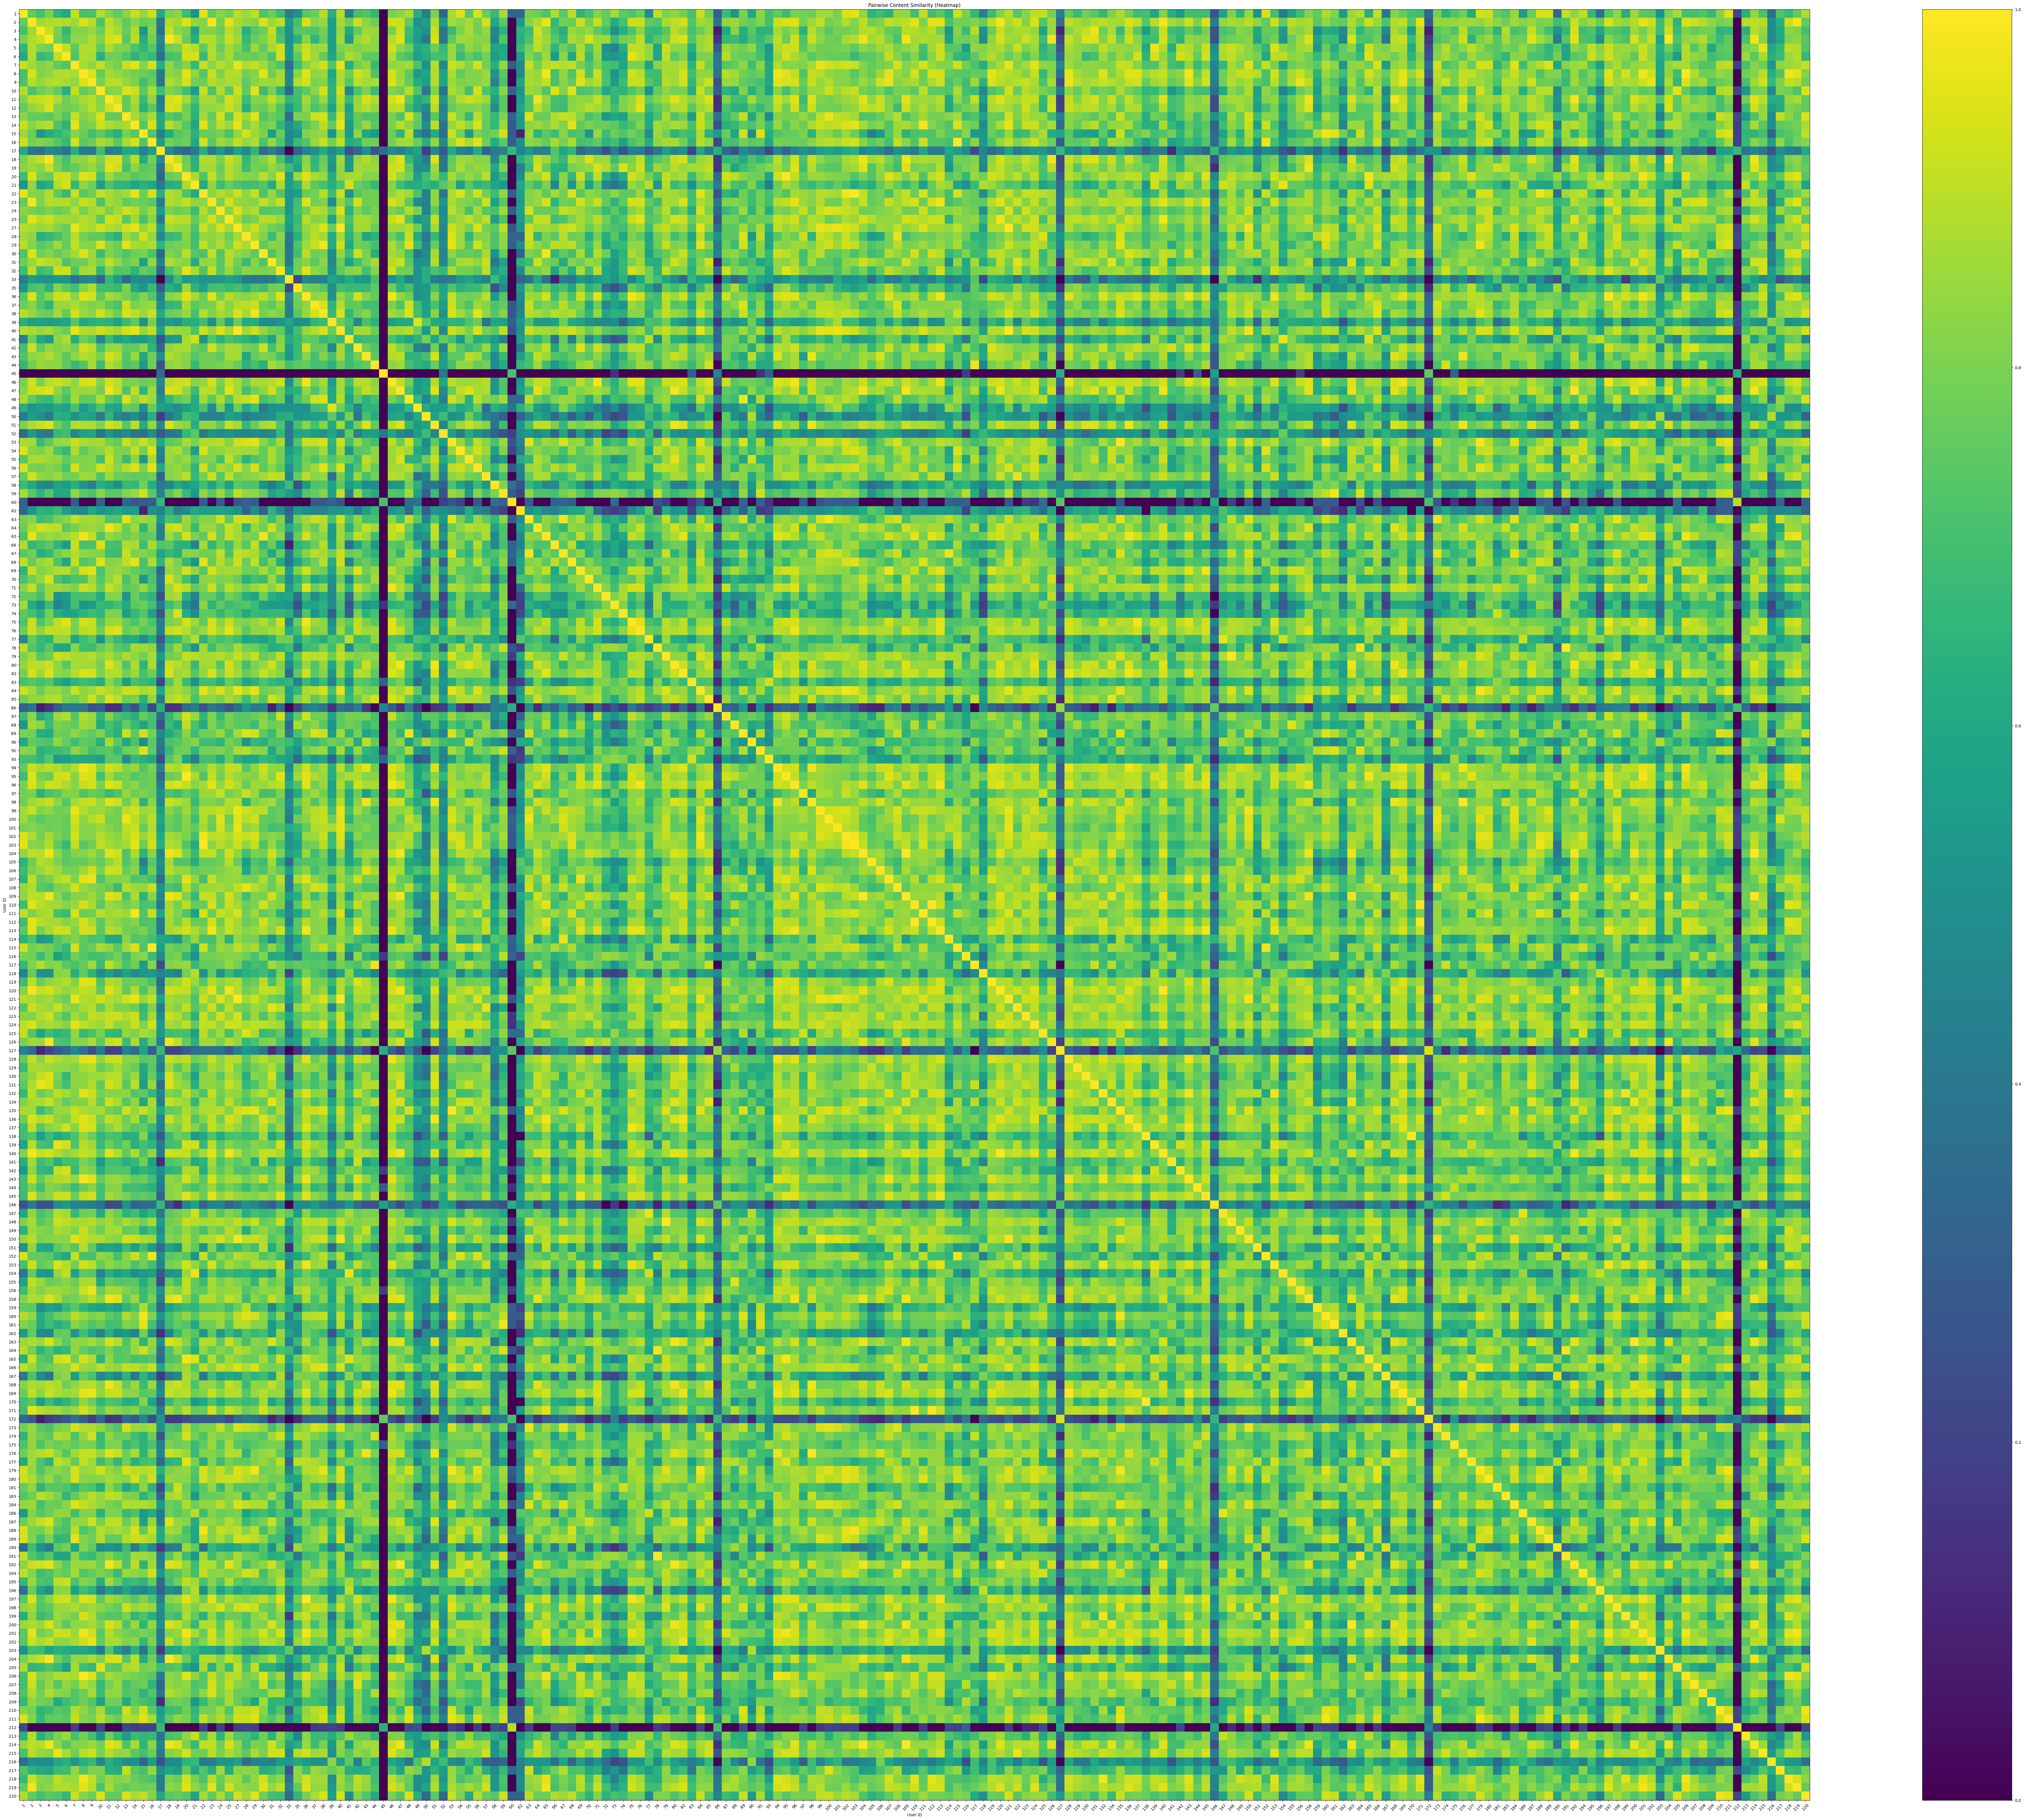

In [49]:
# 1D Visualization (Heatmap):
plt.figure(figsize=(100, 80))
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(user_ids)), user_ids, rotation=45)
plt.yticks(range(len(user_ids)), user_ids)
plt.title('Pairwise Content Similarity (Heatmap)')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


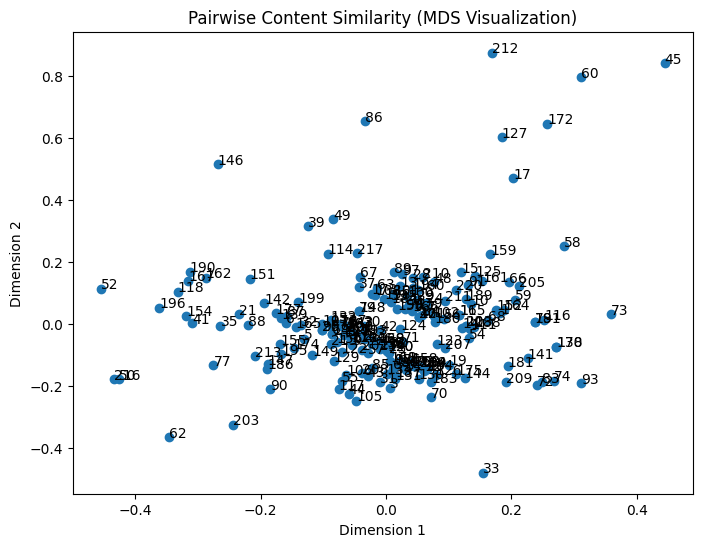

In [45]:
# 2D Visualization (Scatter Plot with MDS)
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity='precomputed')
mds_coords = mds.fit_transform(1 - similarity_matrix)  # Convert to distances

plt.figure(figsize=(8, 6))
plt.scatter(mds_coords[:, 0], mds_coords[:, 1])
for i, user_id in enumerate(user_ids):
    plt.annotate(user_id, (mds_coords[i, 0], mds_coords[i, 1]))
plt.title('Pairwise Content Similarity (MDS Visualization)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [24]:
import networkx as nx
G = nx.DiGraph(directed=True)
for i in df['id']:
    G.add_node(i)
    for j in df[df['id'] == i]['subscriber_ids'].iloc[0]:
        G.add_edge(j, i)
    for j in df[df['id'] == i]['subscription_ids'].iloc[0]:
        G.add_edge(i, j)

In [12]:
!pip install gravis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.1/659.1 kB 5.4 MB/s eta 0:00:00


In [25]:
import gravis as gv
import networkx as nx

gv.d3(G)

In [34]:
spl = dict(nx.all_pairs_shortest_path_length(G))
spl[169][173]

2

In [55]:
def get_graph_similarity(user_id1: int, user_id2: int):
    similarity = 0
    if user_id2 in spl[user_id1].keys():
        similarity += spl[user_id1][user_id2]
    if user_id1 in spl[user_id2].keys():
        similarity += spl[user_id2][user_id1]
    return 1 / similarity if similarity != 0 else 0

def hybrid_similarity_score(user_id1: int, user_id2: int):
    similarity = 0
    similarity += get_content_similarity(df, user_id1, user_id2) * 0.3
    similarity += get_graph_similarity(user_id1, user_id2) * 0.7
    return similarity

hybrid_similarity_score(169, 173)

0.6024876234590519

In [52]:
# Calculate pairwise similarity scores
user_ids = df['id'].unique()
similarity_matrix = np.zeros((len(user_ids), len(user_ids)))

for i, user1 in enumerate(user_ids):
    for j, user2 in enumerate(user_ids):
        similarity_matrix[i, j] = hybrid_similarity_score(user1, user2)

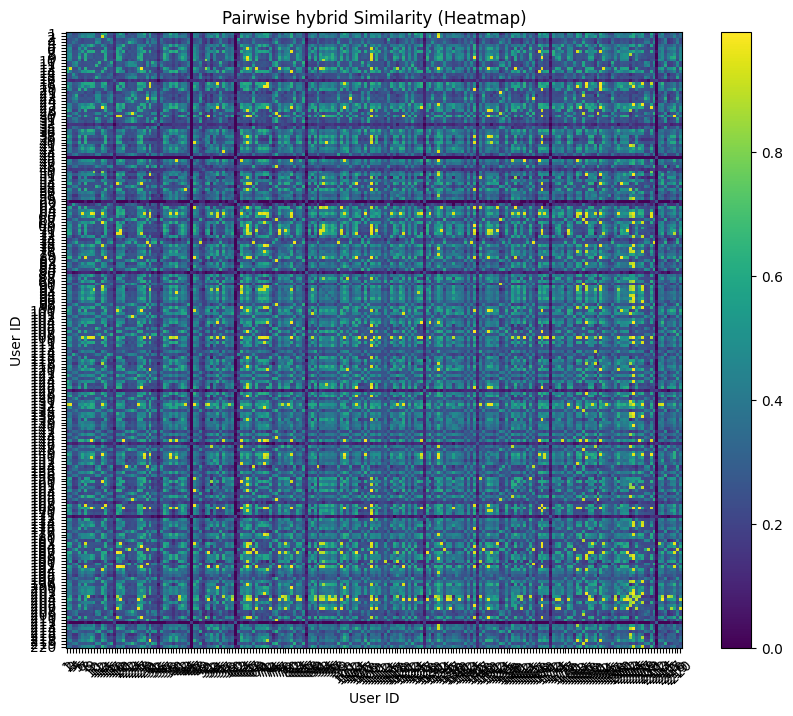

In [54]:
# 1D Visualization (Heatmap):
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(user_ids)), user_ids, rotation=45)
plt.yticks(range(len(user_ids)), user_ids)
plt.title('Pairwise hybrid Similarity (Heatmap)')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.show()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X.shape)

(4, 9)
